In [9]:
#1
import numpy as np

a = np.random.random((10,3))
print(a)
print ((a[np.arange(a.shape[0]), np.array(np.argmin(abs(a - 0.5), axis=1))]).reshape(10,1))


[[0.6694517  0.45357861 0.01634862]
 [0.07587502 0.58266461 0.53124547]
 [0.3936541  0.85800046 0.96974376]
 [0.00963612 0.44383397 0.14956709]
 [0.22300177 0.01200955 0.14229032]
 [0.76049356 0.28214098 0.71108467]
 [0.20211118 0.62225028 0.34283543]
 [0.55505645 0.83650727 0.90894616]
 [0.15173797 0.41839828 0.81858977]
 [0.3474595  0.32554586 0.52521638]]
[[0.45357861]
 [0.53124547]
 [0.3936541 ]
 [0.44383397]
 [0.22300177]
 [0.71108467]
 [0.62225028]
 [0.55505645]
 [0.41839828]
 [0.52521638]]


In [10]:
#2
a = np.random.random((6,6))
print(a)
print ((np.array(np.sum(a, axis = 1)/np.amin(a, axis = 0)).reshape(6, 1)))


[[0.61162093 0.71971069 0.95584763 0.19298059 0.61067115 0.20700521]
 [0.77141295 0.83814121 0.85239949 0.94961555 0.65146616 0.92674925]
 [0.34246399 0.57091106 0.27832572 0.98065596 0.03882621 0.46472399]
 [0.48778643 0.14542557 0.45820561 0.61425962 0.08782103 0.79121399]
 [0.17406713 0.1646434  0.3458206  0.48496624 0.8911004  0.47033904]
 [0.40530822 0.09494068 0.21889789 0.87098046 0.27631316 0.850467  ]]
[[18.94577237]
 [52.55686533]
 [12.2244529 ]
 [13.39363834]
 [65.1862982 ]
 [13.12482627]]


In [11]:
#3
x = np.array([6,2,1,3,0,0,5,7,0])
print( max(filter(lambda a: (a[1] and not a[0]), zip(x, x[1:])), key=lambda a: a[1])[1])

5


In [12]:
#4
x = np.ones(10)
i = np.array([0,1,2,3,5,5,5,8])
print( x + np.bincount(i, minlength=len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [13]:
#5
a = np.arange(16).reshape(4,4)
b = [list(a.diagonal(3-i)) for i in range (len(a)*2 - 1)]
print (dict(zip(np.linspace(0, len(a)*2 - 1, len(a)*2).astype(int), b)))

{0: [3], 1: [2, 7], 2: [1, 6, 11], 3: [0, 5, 10, 15], 4: [4, 9, 14], 5: [8, 13], 6: [12]}


Введите число точек : 2500
35 итераций
Отклонение :  4.943147779736624e-06


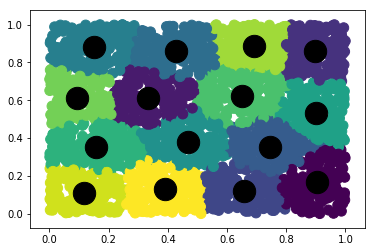

In [14]:
#6
import matplotlib.pyplot as plt


def k_means(data, k, itr, thresh):
    centers = data[:k]
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(data - centers[:, None], axis = 2), axis = 0)
        new_centers = np.array([data[labels == j, :].mean(axis = 0) for j in range(k)])
        d = ((new_centers - centers)**2).sum()
        if (d <= thresh) or (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        raise RuntimeError("ОШИБКА, ", itr, "итераций")
    print(i, "итераций")
    return(centers, d, labels)

n = int(input("Введите число точек : "))
k = 15
data = np.random.rand(n, 2)
itr = 100
thresh = 1e-05
centers, d, labels = k_means(data, k, itr, thresh) 

%matplotlib inline
plt.scatter(x = data[:, 0], y = data[:, 1], s = 100, c = labels)
plt.scatter(x = centers[:, 0], y = centers[:, 1], s = 500, c = 'k')
print("Отклонение : ",d)
plt.show()